In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))


2022-05-08 11:37:10.261098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 11:37:10.261143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-08 11:37:12.900960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 11:37:12.901022: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 11:37:12.901044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-GC2VT9N): /proc/driver/nvidia/version does not exist
2022-05-08 11:37:12.901262: I tensorflow/core/platform/cpu_fe

In [2]:
model.add(keras.layers.Dense(10, activation="softmax"))


In [3]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])


In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]


In [5]:
import os
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_cifar10_model.h5", save_best_only=True)
run_index = 1  # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs",
                          "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


In [6]:
%load_ext tensorboard
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

%tensorboard - -logdir=my_cifar10_logs - -port = 6006


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

In [7]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)


Epoch 1/100
 758/1407 [===============>..............] - ETA: 8s - loss: 5.6200 - accuracy: 0.1410

In [8]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)


157/157 [==============================] - 1s 4ms/step - loss: 1.7626 - accuracy: 0.3598


[1.7626469135284424, 0.3598000109195709]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1  # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs",
                          "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)


Epoch 1/100
1407/1407 [==============================] - 45s 25ms/step - loss: 1.8455 - accuracy: 0.3407 - val_loss: 1.6405 - val_accuracy: 0.4078
Epoch 2/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.6660 - accuracy: 0.4076 - val_loss: 1.5691 - val_accuracy: 0.4324
Epoch 3/100
1407/1407 [==============================] - 33s 24ms/step - loss: 1.5969 - accuracy: 0.4315 - val_loss: 1.5329 - val_accuracy: 0.4506
Epoch 4/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.5480 - accuracy: 0.4490 - val_loss: 1.5222 - val_accuracy: 0.4524
Epoch 5/100
1407/1407 [==============================] - 33s 24ms/step - loss: 1.5044 - accuracy: 0.4638 - val_loss: 1.4547 - val_accuracy: 0.4812
Epoch 6/100
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4686 - accuracy: 0.4772 - val_loss: 1.4372 - val_accuracy: 0.4842
Epoch 7/100
1407/1407 [==============================] - 33s 24ms/step - loss: 1.4337 - accuracy: 0.4907 - val_loss: 1

[1.3205668926239014, 0.531000018119812]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1  # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs",
                          "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)


Epoch 1/100
1407/1407 [==============================] - 22s 13ms/step - loss: 1.9357 - accuracy: 0.3048 - val_loss: 1.8938 - val_accuracy: 0.3078
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7121 - accuracy: 0.3939 - val_loss: 1.7143 - val_accuracy: 0.3780
Epoch 3/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.6107 - accuracy: 0.4341 - val_loss: 1.6580 - val_accuracy: 0.4094
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5457 - accuracy: 0.4586 - val_loss: 1.6352 - val_accuracy: 0.4288
Epoch 5/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4900 - accuracy: 0.4785 - val_loss: 1.6444 - val_accuracy: 0.4294
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4411 - accuracy: 0.4985 - val_loss: 1.5173 - val_accuracy: 0.4714
Epoch 7/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3978 - accuracy: 0.5127 - val_loss: 1

[1.4570482969284058, 0.5162000060081482]

In [ ]:
from tensorflow import keras
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)


NameError: name 'keras' is not defined

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1  # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs",
                          "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)


In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train_full.shape


(50000, 32, 32, 3)

In [12]:
X_train_full[0][0][0]

array([59, 62, 63], dtype=uint8)

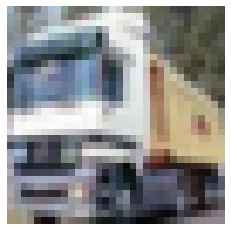

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap="binary")
plt.axis("off")
plt.show()
